In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
plt.style.use('ggplot')

# Data loading

In [4]:
data=pd.read_csv('/Users/ningzhang/Study/DataScience_takehome/Practices-DS-takehome-Ning/Employee_retention/Employee_Retention.csv', parse_dates=['join_date', 'quit_date'])
data.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   24702 non-null  int64         
 1   employee_id  24702 non-null  float64       
 2   company_id   24702 non-null  int64         
 3   dept         24702 non-null  object        
 4   seniority    24702 non-null  int64         
 5   salary       24702 non-null  float64       
 6   join_date    24702 non-null  datetime64[ns]
 7   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
data.describe()

,Unnamed: 0,employee_id,company_id,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702,13510
mean,12351.500000,501604.403530,3.426969,14.127803,138183.345478,2013-06-29 09:39:37.556473344,2014-05-02 17:43:38.327165184
min,1.000000,36.000000,1.000000,1.000000,17000.000000,2011-01-24 00:00:00,2011-10-13 00:00:00
25%,6176.250000,250133.750000,1.000000,7.000000,79000.000000,2012-04-09 00:00:00,2013-06-28 00:00:00
50%,12351.500000,500793.000000,2.000000,14.000000,123000.000000,2013-06-24 00:00:00,2014-06-20 00:00:00
75%,18526.750000,753137.250000,5.000000,21.000000,187000.000000,2014-09-17 00:00:00,2015-03-27 00:00:00
max,24702.000000,999969.000000,12.000000,99.000000,408000.000000,2015-12-10 00:00:00,2015-12-09 00:00:00
std,7130.997511,288909.026101,2.700011,8.089520,76058.184573,NaN,NaN


In [7]:
data.isnull().sum()

Unnamed: 0         0
employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

# Remove outliters

In [8]:
# remove seniority outliters
np.sort(data['seniority'].unique())
print('Seniority larger than 29: ', sum(data['seniority']>29))
data[data['seniority']>29]
data=data[data['seniority']<=29]
data.describe()

Seniority larger than 29:  2


,Unnamed: 0,employee_id,company_id,seniority,salary,join_date,quit_date
count,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700,13508
mean,12350.500000,501616.624899,3.426802,14.120972,138176.275304,2013-06-29 10:53:35.805668352,2014-05-02 17:32:36.174118912
min,1.000000,36.000000,1.000000,1.000000,17000.000000,2011-01-24 00:00:00,2011-10-13 00:00:00
25%,6175.750000,250165.250000,1.000000,7.000000,79000.000000,2012-04-09 00:00:00,2013-06-28 00:00:00
50%,12350.500000,500793.000000,2.000000,14.000000,123000.000000,2013-06-24 00:00:00,2014-06-20 00:00:00
75%,18525.250000,753142.250000,5.000000,21.000000,187000.000000,2014-09-17 00:00:00,2015-03-27 00:00:00
max,24700.000000,999969.000000,12.000000,29.000000,408000.000000,2015-12-10 00:00:00,2015-12-09 00:00:00
std,7130.420161,288908.533280,2.699752,8.054137,76056.331953,NaN,NaN


In [9]:
# check wether the salary has outliters
np.sort(data['salary'].unique())
# it looks like super high salary is commom from the data set

array([ 17000.,  18000.,  19000.,  20000.,  21000.,  22000.,  23000.,
        24000.,  25000.,  26000.,  27000.,  28000.,  29000.,  30000.,
        31000.,  32000.,  33000.,  34000.,  35000.,  36000.,  37000.,
        38000.,  39000.,  40000.,  41000.,  42000.,  43000.,  44000.,
        45000.,  46000.,  47000.,  48000.,  49000.,  50000.,  51000.,
        52000.,  53000.,  54000.,  55000.,  56000.,  57000.,  58000.,
        59000.,  60000.,  61000.,  62000.,  63000.,  64000.,  65000.,
        66000.,  67000.,  68000.,  69000.,  70000.,  71000.,  72000.,
        73000.,  74000.,  75000.,  76000.,  77000.,  78000.,  79000.,
        80000.,  81000.,  82000.,  83000.,  84000.,  85000.,  86000.,
        87000.,  88000.,  89000.,  90000.,  91000.,  92000.,  93000.,
        94000.,  95000.,  96000.,  97000.,  98000.,  99000., 100000.,
       101000., 102000., 103000., 104000., 105000., 106000., 107000.,
       108000., 109000., 110000., 111000., 112000., 113000., 114000.,
       115000., 1160

# Create tabke with columns: day, employee_headcount, and company_id

In [10]:
data.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [11]:
unique_date=pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company=sorted(data['company_id'].unique())

day=[]
companies=[]
headcount=[]

for date in unique_date:
    for company in unique_company:
        join=len(data[(data['join_date']<=date)& (data['company_id']==company)])
        quit=len(data[(data['quit_date']<=date)& (data['company_id']==company)])
        day.append(date)
        companies.append(company)
        headcount.append(join-quit)
table=pd.DataFrame({'day': day,'company': companies, 'employee_headcount':headcount})
table.head(10)


,day,company,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
5,2011-01-24,6,3
6,2011-01-24,7,1
7,2011-01-24,8,6
8,2011-01-24,9,3
9,2011-01-24,10,0


# Employee churn analysis

Feature engineering

In [12]:
# separate stay and quit data
quitdf=data[~data['quit_date'].isnull()]
staydf=data[data['quit_date'].isnull()]
quitdf.head()
staydf.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
6,7,88600.0,4,customer_service,21,107000.0,2013-10-21,NaT
7,8,716309.0,2,customer_service,4,30000.0,2014-03-05,NaT
9,10,504159.0,1,sales,7,104000.0,2012-06-12,NaT
11,12,904158.0,2,marketing,17,230000.0,2015-05-11,NaT


/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/3573238245.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workdays, bins=100, kde=True,hist_kws=hist_kws)


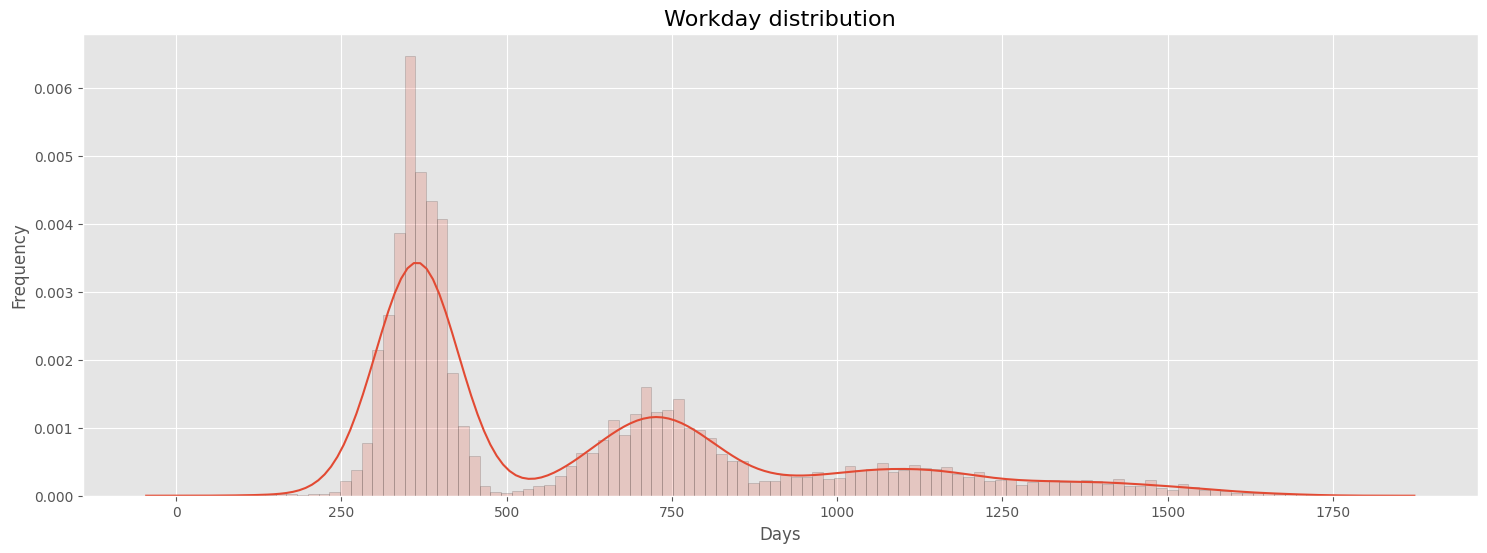

In [71]:
# calculate total working days
durt=quitdf['quit_date']-quitdf['join_date']
workdays=list(map(lambda durt:durt.days, durt))  # map(fun, iter), returns a map object of the results after applying the given function to each item of a given iterable 
workdays[:5]

fig,ax=plt.subplots(nrows=1,ncols=1, figsize=(18,6))
hist_kws={'histtype': 'bar', 'edgecolor': 'black', 'alpha':0.2}
sns.distplot(workdays, bins=100, kde=True,hist_kws=hist_kws)
ax.set_title('Workday distribution', fontsize=16)
ax.set_xlabel('Days')
ax.set_ylabel('Frequency')
plt.show()


From above distribution of working day, it looks like there are lots of employee leaving the company when they work one year around. 

/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/4050430193.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(months, bins=12, kde=True, hist_kws=hist_kws)


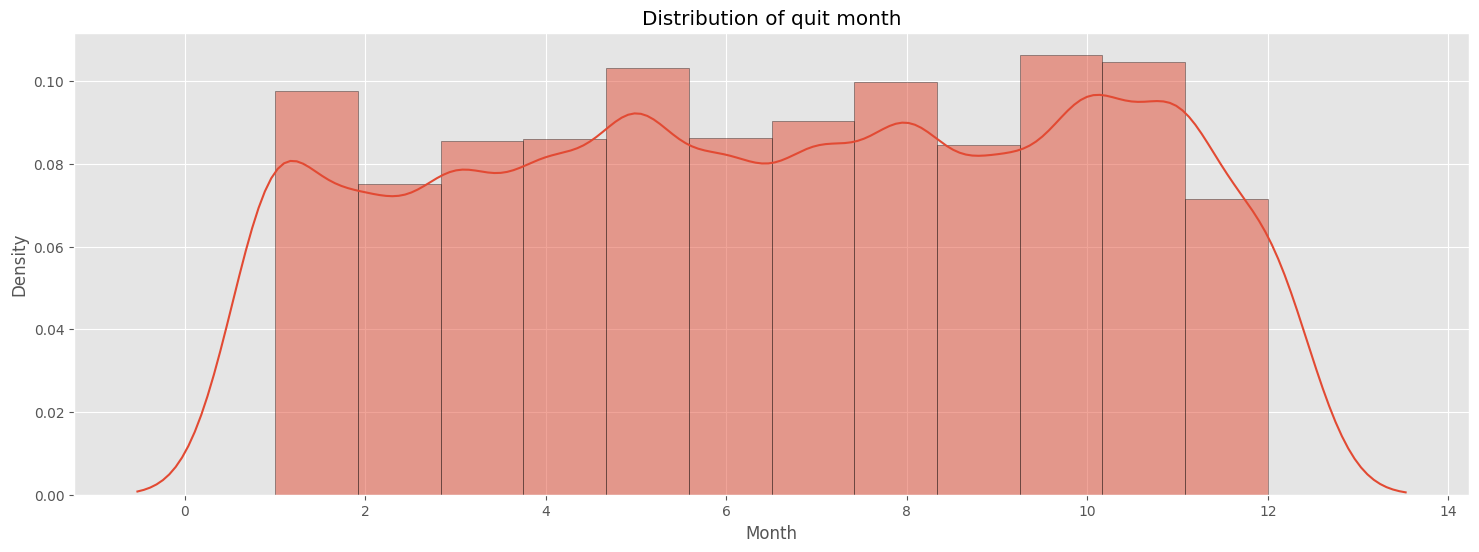

In [73]:
# Let check which month is the most frequt month to leave
months=list(map(lambda x: x.month, quitdf['quit_date']))
months[:5]

fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(18,6))
hist_kws={'histtype': 'bar', 'edgecolor': 'black', 'alpha':0.5}
sns.distplot(months, bins=12, kde=True, hist_kws=hist_kws)
ax.set_title('Distribution of quit month')
ax.set_xlabel('Month')
plt.show()

From the quit month distribution, there is not an obvious diffrence across months. While, for December, it is low when ompared with other months.

In [15]:
# concat quit dataframe
quitdf['workdays']=workdays
quitdf['quitmonth']=months
quitdf.head()

/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/3128060395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quitdf['workdays']=workdays
/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/3128060395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quitdf['quitmonth']=months


,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,workdays,quitmonth
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,10
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,4
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,6
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,8
5,6,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578,8


# Decision Tree model
- look for the main factors driving employee churn

In [28]:
#import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [29]:
# choose the subset
stop_date=pd.to_datetime('2015-12-13')-pd.DateOffset(days=365+31)  # DateOffset: Standard kind of date increment used for a date range.
subset=data[data['join_date']<stop_date]

# Binary label for early quit (less than 13 months)
no_early_quit=(subset['quit_date'].isnull()) | (subset['quit_date']>subset['join_date']+pd.DateOffset(days=365+31))
subset['quit']=1-no_early_quit.astype(int)
subset.head()

/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/2684609121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['quit']=1-no_early_quit.astype(int)


,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0


In [59]:
#Label encoding
le=LabelEncoder()
train_x=subset[['company_id', 'seniority', 'salary']]
train_x['dept']=le.fit_transform(subset['dept'])   # need to convert string to float for decision tree
train_y=subset['quit'].values

train_x.head()


/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/1386615074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['dept']=le.fit_transform(subset['dept'])   # need to convert string to float for decision tree


,company_id,seniority,salary,dept
0,7,28,89000.0,0
1,7,20,183000.0,4
2,4,14,101000.0,4
3,7,20,115000.0,0
4,2,23,276000.0,1


In [77]:
#Build decision tree 
model=DecisionTreeClassifier(max_depth=4, min_samples_leaf=30,random_state=42)  # the max_depth decides the running time significantly
model=model.fit(train_x,train_y)
model.score(train_x,train_y)

0.6995017645837658

In [78]:
# present text tree
features=list(train_x.columns)
print(features)
print()

text_representation=tree.export_text(model)
print(text_representation)

['company_id', 'seniority', 'salary', 'dept']

|--- feature_2 <= 224500.00
|   |--- feature_2 <= 62500.00
|   |   |--- feature_1 <= 6.50
|   |   |   |--- feature_2 <= 21500.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  21500.00
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  6.50
|   |   |   |--- feature_2 <= 57500.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  57500.00
|   |   |   |   |--- class: 0
|   |--- feature_2 >  62500.00
|   |   |--- feature_2 <= 182500.00
|   |   |   |--- feature_2 <= 89500.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  89500.00
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  182500.00
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7.50
|   |   |   |   |--- class: 0
|--- feature_2 >  224500.00
|   |--- feature_2 <= 274500.00
|   |   |--- feature_1 <= 17.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >

"\nfig.savefig('pathname.png')   # if needed\n"

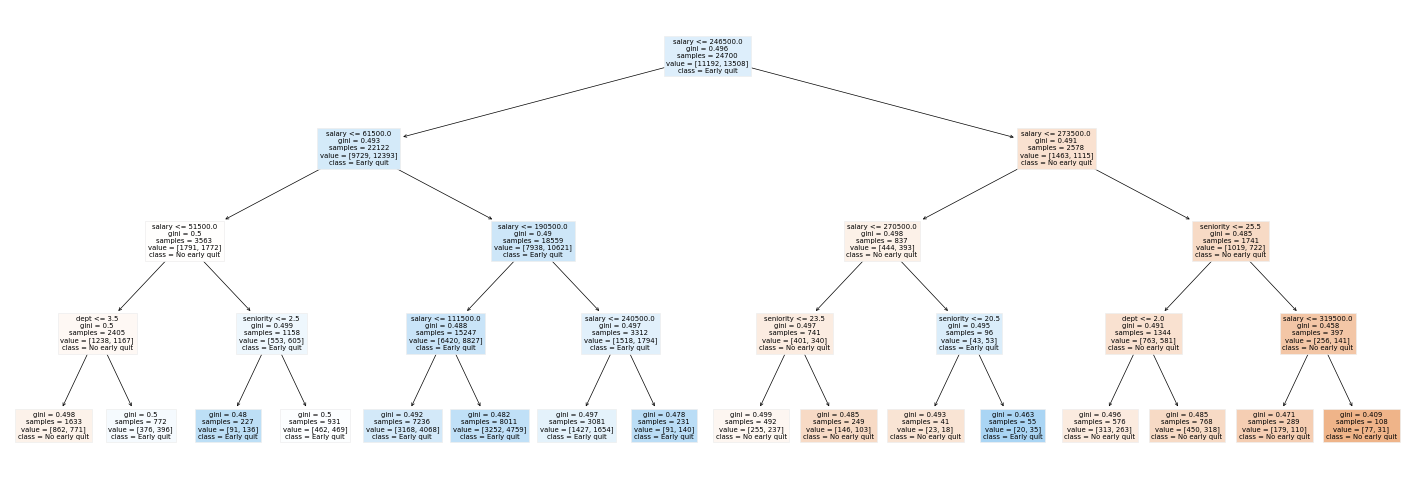

In [99]:
# visualization
features=list(train_x.columns)
targets=['No early quit', 'Early quit']
fig=plt.figure(figsize=(18,6))
_=tree.plot_tree(model, feature_names=features, class_names=targets,filled=True)     

'''
fig.savefig('pathname.png')   # if needed
'''

In [100]:
# present importance
print(features)
model.feature_importances_

importance=sorted(zip(features, model.feature_importances_), key=lambda x: -x[1])
print(importance)

['company_id', 'seniority', 'salary', 'dept']
[('salary', 0.9103293333655065), ('seniority', 0.06981120492179059), ('dept', 0.01985946171270285), ('company_id', 0.0)]


/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/2511309541.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset[subset['quit']==0]['salary'], hist_kws=hist_kws, label='No early quit')
/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/2511309541.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

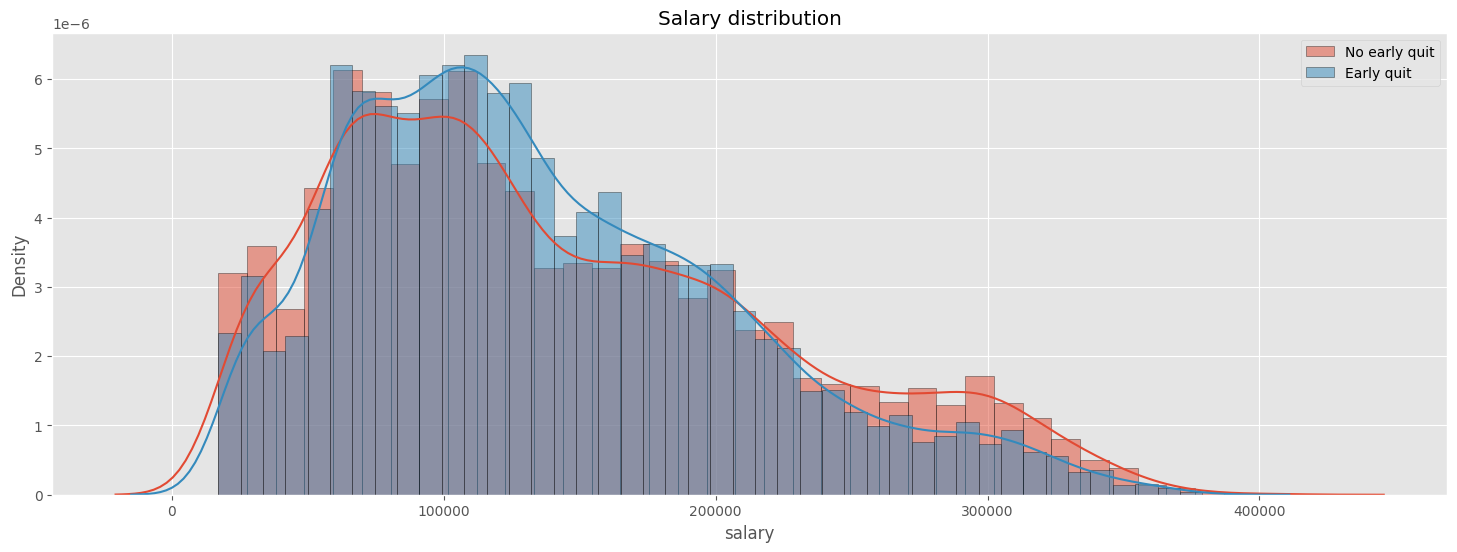

In [101]:
# visualization
fig,ax=plt.subplots(figsize=(18,6))
hist_kws={'histtype': 'bar', 'edgecolor': 'black', 'alpha':0.5}
sns.distplot(subset[subset['quit']==0]['salary'], hist_kws=hist_kws, label='No early quit')
sns.distplot(subset[subset['quit']==1]['salary'], hist_kws=hist_kws, label='Early quit')
ax.set_title('Salary distribution')
ax.legend()
plt.show()


# Try with no subset and no early quit definition

In [102]:
#import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [103]:
# choose the subset
subset=data
# Binary label for early quit (less than 13 months)
no_quit=(subset['quit_date'].isnull())
subset['quit']=1-no_quit.astype(int)
subset.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


In [104]:
#Label encoding
le=LabelEncoder()
train_x=subset[['company_id', 'seniority', 'salary']]
train_x['dept']=le.fit_transform(subset['dept'])   # need to convert string to float for decision tree
train_y=subset['quit'].values

train_x.head()


/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_13715/1386615074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['dept']=le.fit_transform(subset['dept'])   # need to convert string to float for decision tree


,company_id,seniority,salary,dept
0,7,28,89000.0,0
1,7,20,183000.0,4
2,4,14,101000.0,4
3,7,20,115000.0,0
4,2,23,276000.0,1


In [105]:
#Build decision tree 
model=DecisionTreeClassifier(max_depth=4, min_samples_leaf=30,random_state=42)  # the max_depth decides the running time significantly
model=model.fit(train_x,train_y)
model.score(train_x,train_y)

0.5652631578947368

In [106]:
# present text tree
features=list(train_x.columns)
print(features)
print()

text_representation=tree.export_text(model)
print(text_representation)

['company_id', 'seniority', 'salary', 'dept']

|--- feature_2 <= 246500.00
|   |--- feature_2 <= 61500.00
|   |   |--- feature_2 <= 51500.00
|   |   |   |--- feature_3 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  3.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  51500.00
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- class: 1
|   |--- feature_2 >  61500.00
|   |   |--- feature_2 <= 190500.00
|   |   |   |--- feature_2 <= 111500.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  111500.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  190500.00
|   |   |   |--- feature_2 <= 240500.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  240500.00
|   |   |   |   |--- class: 1
|--- feature_2 >  246500.00
|   |--- feature_2 <= 273500.00
|   |   |--- feature_2 <= 270500.00
|   |   |   |--- feature_1 <= 23.50
|   |   |   |   |--- class: 0
|   |   |   |--- fe

"\nfig.savefig('pathname.png')   # if needed\n"

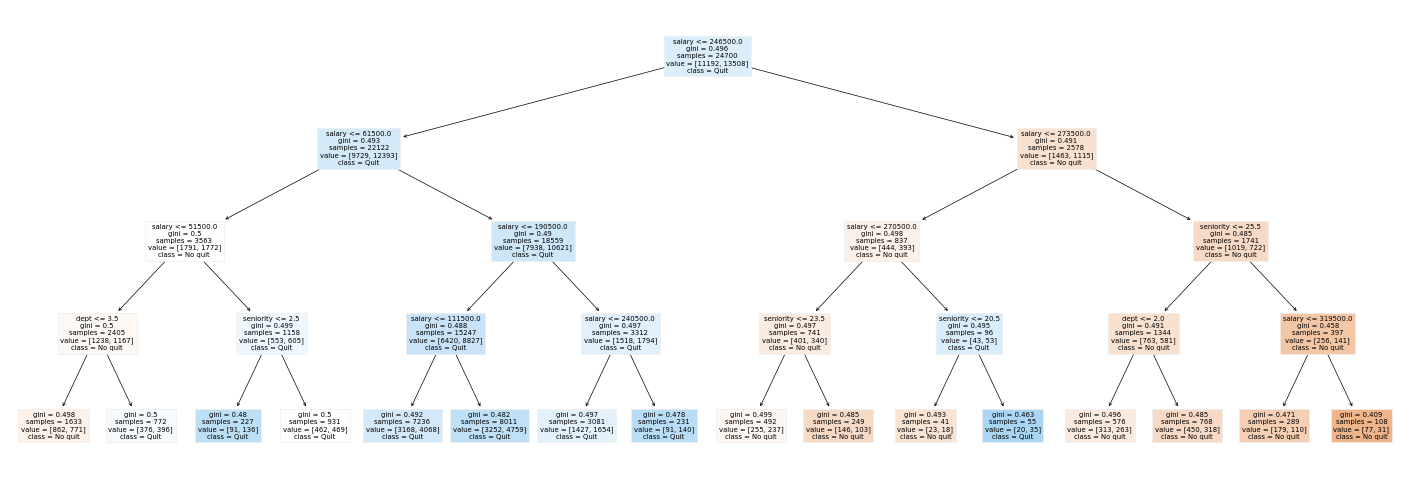

In [107]:
# visualization
features=list(train_x.columns)
targets=['No quit', 'Quit']
fig=plt.figure(figsize=(18,6))
_=tree.plot_tree(model, feature_names=features, class_names=targets,filled=True)    

'''
fig.savefig('pathname.png')   # if needed
'''

In [108]:
# present importance
print(features)
model.feature_importances_

importance=sorted(zip(features, model.feature_importances_), key=lambda x: -x[1])
print(importance)

['company_id', 'seniority', 'salary', 'dept']
[('salary', 0.9103293333655065), ('seniority', 0.06981120492179059), ('dept', 0.01985946171270285), ('company_id', 0.0)]


# Understanding of outcomes

- The salary is the most important feature that drives employee churn.
- Given the heavy importance of salary, it is better to add the new feature of next job's salary. Or, we can add the promotions or raises receieved during employee tenure. 
- Key finding is that there are many employees quit after the first year and at year anniversaries. Both cases make sense. Even if you don't like the current job, you often stay for 1 year to obtain the stocks. Also, the begining of the year is well known to be the best time to change job: companies are hiring more and you often want to stay unit end of Dec to get the calendar year bonus.
- Enployee with super low or super high salary are less likely to quit. Probably because employees with high salary are happy there and employess with how salary are not marketable, so they have a hard time finding a new job.